In [1]:
import os
from collections import defaultdict
from datetime import datetime
import csv

# Создаем словарь (айди-группа) из файла skuid_st_cg.tsv
sku_group = {}
with open(r"C:\Users\ekaterina\Downloads\skuid_st_cg.tsv",encoding="utf8") as f:
    reader = csv.reader(f)
    next(reader, None)  # skip the headers
    for line in f:
        line = line.strip().split('\t')
        if len(line) == 3:
            sku_id, st, cg = line
            sku_group[sku_id] = cg[0]




In [2]:
# Создаем список файлов, по которым нужно пройтись
sales_files = sorted([f for f in os.listdir(r"C:\eps_separate1") if f.endswith('.tsv')])


In [3]:
# Для каждой группы создаем список из 365 элементов
group_sales = defaultdict(lambda: [0] * 365)

In [4]:
# Пройдемся построчно по всем файлам и обновим вектора групп в зависимости от дня года
for file in sales_files:
    with open(os.path.join(r"C:\eps_separate1", file)) as f:
        for line in f:
            ts, sku, q = line.strip().split('\t')
            if sku in sku_group:
                group = sku_group[sku]
                day_of_year = datetime.strptime(ts, '%Y-%m-%d').timetuple().tm_yday - 1
                group_sales[group][day_of_year] += float(q)

In [5]:
# На выходе получим для каждой группы продажи всех аптек в зависимости от дня года
for group, sales in group_sales.items():
    print(group, sales)

S [4663.102666999999, 10861.98804600001, 13137.25244400001, 14258.73847400001, 14831.45285400001, 13414.004523000007, 10219.409777000003, 12399.042096000016, 12656.033489000005, 17749.64954700001, 18172.07255300003, 18332.624556000013, 16578.888100000022, 17965.939847000005, 15720.660885000014, 14743.572680000012, 20976.28885800001, 20776.699738, 20324.469134000014, 20925.448852000012, 22122.744164000018, 18167.059458999993, 15798.835471000008, 23332.200753000023, 23554.622723999997, 24864.588677, 24379.689547000024, 23923.424821000022, 19727.992883000017, 17346.097270000013, 28119.68413800001, 27537.23683400001, 29027.420407999994, 26910.044107000012, 28759.022793000026, 24044.818295000015, 19533.344730000004, 27624.775371000014, 26737.423401000007, 28012.885647000003, 25773.865675941775, 26161.113408000016, 21783.04670100003, 17884.11303600001, 26360.46028900002, 24774.202829, 24909.17231700002, 22892.538485000005, 23209.14349200001, 19333.041251000002, 17642.09285400001, 25006.24848

In [6]:
import pandas as pd
df = pd.DataFrame.from_dict(group_sales, orient='index', columns=range(365))
df.index.name = 'group'

# Выводим датафрейм
print(df)

                 0              1              2              3    \
group                                                               
S        4663.102667   10861.988046   13137.252444   14258.738474   
N       22177.496714   52267.777890   65292.949048  101140.825448   
A       29039.229828   71968.960077   89855.994622   97200.343534   
M       12563.317993   31314.076920   37987.163724   41684.721511   
R       16040.908160   40321.144519   50370.374226   55082.379513   
J       12136.095571   27098.820675   33675.525748   36618.065790   
Z      110292.188698  258106.604240  311081.341880  335388.297525   
P         740.193333    1829.980000    2283.667666    2236.196666   
B        8994.625333   20942.110771   24154.539993   30766.223777   
G        9258.629902   21047.756619   26144.536777   28132.425753   
C       26893.758317   66422.355290   80057.138919   85432.521707   
L        4364.883778   10597.854334   12726.449221   13493.273667   
D       10719.854000   25161.25328

In [7]:
# считаем средние продажи в день 
mean = df.mean().mean()
print('\nMean\n------')
print(round(mean,2))



Mean
------
81940.63


<!-- Мы вычисляем по всем аптекам по конкретной группе число и коэффициент на каждый день, а потом берём конкретную аптеку где продаж за 3 месяца к примеру и делаем прогноз на основе общих данных на 4 месяцМы вычисляем по всем аптекам по конкретной группе число и коэффициент на каждый день, а потом берём конкретную аптеку где продаж за 3 месяца к примеру и делаем прогноз на основе общих данных на 4 месяц -->

In [ ]:
# делим все числа продаж в год на средние продаж в день
# Получаем коэффициенты на каждый день года

In [8]:
index = df/mean
index 

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
group,,,,,,,,,,,,,,,,,,,,,
S,0.056908,0.132559,0.160326,0.174013,0.181002,0.163704,0.124717,0.151317,0.154454,0.216616,...,0.181437,0.190364,0.204807,0.160751,0.146659,0.210209,0.211376,0.221928,0.236308,0.341969
N,0.270653,0.637874,0.796832,1.234318,0.868855,0.836292,0.608173,0.749240,0.709563,1.076327,...,0.976288,1.000599,1.025388,0.855928,0.777428,1.070527,1.097516,1.128859,1.148851,0.986216
A,0.354394,0.878306,1.096599,1.186229,1.233923,1.148589,0.854646,1.040773,0.953316,1.502915,...,1.334590,1.331744,1.424059,1.185328,0.986214,1.434994,1.491833,1.485150,1.540904,1.603402
M,0.153322,0.382156,0.463594,0.508719,0.519575,0.519194,0.359481,0.458249,0.410492,0.637573,...,0.570934,0.578778,0.603879,0.484170,0.420809,0.598530,0.628343,0.653721,0.690867,0.609248
R,0.195763,0.492078,0.614718,0.672223,0.651884,0.643261,0.481760,0.582964,0.545252,0.811202,...,0.759253,0.738358,0.783364,0.644445,0.567626,0.807711,0.828038,0.832402,0.854933,0.885450
J,0.148108,0.330713,0.410975,0.446885,0.464673,0.442383,0.320497,0.401895,0.369109,0.541272,...,0.503685,0.503751,0.524999,0.442078,0.379296,0.534939,0.546790,0.557720,0.607449,0.677840
Z,1.346001,3.149922,3.796423,4.093064,4.153349,4.043852,2.943946,3.694019,3.403949,5.079676,...,4.669756,4.634650,4.897453,4.108297,3.594472,5.011279,5.099769,5.214668,5.468150,6.319119
P,0.009033,0.022333,0.027870,0.027290,0.029919,0.027736,0.019207,0.024902,0.027729,0.034104,...,0.033114,0.028044,0.032080,0.028378,0.025762,0.031456,0.037544,0.035528,0.037368,0.052788
B,0.109770,0.255577,0.294781,0.375470,0.333774,0.311726,0.228270,0.291153,0.262430,0.395157,...,0.389706,0.373121,0.383607,0.317415,0.266053,0.413940,0.407550,0.416472,0.423776,0.567293


In [ ]:
# Возьмем данные продаж за неполный месяц по конкретной аптеке

In [9]:
dfSales = pd.read_csv(r"C:\Users\ekaterina\Downloads\02.tsv",delimiter='\t')
print(dfSales)

            ts  sku    q
0   2021-11-01  118  1.0
1   2021-11-02   97  1.0
2   2021-11-02  104  1.0
3   2021-11-02  111  2.0
4   2021-11-02  112  1.0
5   2021-11-02  117  1.0
6   2021-11-02  119  2.0
7   2021-11-02  122  1.0
8   2021-11-04  114  1.0
9   2021-11-05  100  1.0
10  2021-11-05  109  1.0
11  2021-11-05  124  1.0
12  2021-11-05  127  1.0
13  2021-11-06  103  1.0
14  2021-11-06  114  1.0
15  2021-11-06  123  1.0
16  2021-11-08   96  1.0
17  2021-11-09   93  1.0
18  2021-11-09  116  1.0
19  2021-11-10   93  1.0
20  2021-11-10  116  1.0
21  2021-11-10  121  2.0
22  2021-11-11   98  2.0
23  2021-11-11  121  1.0
24  2021-11-13  110  1.0
25  2021-11-15  102  1.0
26  2021-11-15  106  1.0
27  2021-11-15  115  1.0
28  2021-11-15  120  1.0
29  2021-11-15  123  1.0
30  2021-11-16  126  1.0
31  2021-11-19  105  1.0
32  2021-11-19  131  1.0
33  2021-11-20  125  1.0
34  2021-11-21  121  1.0
35  2021-11-22   94  4.0
36  2021-11-22   99  1.0
37  2021-11-22  112  1.0
38  2021-11-24  130  1.0


In [ ]:
#продажи конкретной аптеки за день делим на получившийся коэф в это день.
# Нужны коэффиценты за 305-333 дни

In [10]:
# преобразуем словарь с группой и id в татблицу
df_ = pd.DataFrame(sku_group.items(),columns=['sku_id', 'cg']) 
df_ 

,sku_id,cg
0,1,M
1,2,R
2,3,R
3,4,Z
4,5,A
...,...,...
7306896,11478796,N
7306897,11478797,C
7306898,11478798,R
7306899,11478799,C


In [11]:
groups = []
df_G = df_ .groupby(['cg'])['sku_id'].sum()
for k,v in df_G.items():
    groups.append(k)
groups

['A', 'B', 'C', 'D', 'G', 'H', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'V', 'Z']

In [12]:
#соединим таблицу с датой и количеством+группа
df_['sku_id']=df_['sku_id'].astype(int)
dfSales['sku']=dfSales['sku'].astype(int)
result = pd.merge(df_, dfSales, left_on=  ['sku_id'],
                   right_on= ['sku'], 
                   how = 'inner')
result#.groupby(['cg', 'ts'])["q"].sum()


,sku_id,cg,ts,sku,q
0,93,R,2021-11-09,93,1.0
1,93,R,2021-11-10,93,1.0
2,95,M,2021-11-27,95,0.1
3,96,C,2021-11-08,96,1.0
4,97,P,2021-11-02,97,1.0
5,97,P,2021-11-28,97,1.0
6,98,J,2021-11-11,98,2.0
7,99,S,2021-11-22,99,1.0
8,100,A,2021-11-05,100,1.0
9,101,N,2021-11-25,101,1.0


In [448]:
#создадим список с нужным диапазоном дат
import datetime as DT


start_date = DT.datetime(2021, 11, 1)
end_date = DT.datetime(2021, 11, 28)

res = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%Y-%m-%d').tolist()

In [17]:
# создадим словарь в котором дата будет ключем,а соответствующий номер дня значением
n = list(range(305,333))
d = res
DateDict = dict(zip(d, n))

# преобразуем в датафрейм
new_result = pd.DataFrame(DateDict.items(),columns=['ts', 'day']) 
new_result

,ts,day
0,2021-11-01,305
1,2021-11-02,306
2,2021-11-03,307
3,2021-11-04,308
4,2021-11-05,309
5,2021-11-06,310
6,2021-11-07,311
7,2021-11-08,312
8,2021-11-09,313
9,2021-11-10,314


In [99]:
# соединим таблицу с датой и номером дня с таблцей продаж
new_result['ts']=new_result['ts'].astype('datetime64')
result['ts']=result['ts'].astype('datetime64')
New_res = pd.merge(new_result, result, left_on=  ['ts'],
                   right_on= ['ts'], 
                   how = 'inner')
New_res
#group = pd.DataFrame(New_res.groupby(['cg', 'ts','day'])["q"].sum())
#group = New_res.groupby(['cg', 'ts','day'])["q"].sum()
#group

,ts,day,sku_id,cg,sku,q
0,2021-11-01,305,118,Z,118,1.0
1,2021-11-02,306,97,P,97,1.0
2,2021-11-02,306,104,R,104,1.0
3,2021-11-02,306,111,N,111,2.0
4,2021-11-02,306,112,R,112,1.0
5,2021-11-02,306,119,R,119,2.0
6,2021-11-04,308,114,J,114,1.0
7,2021-11-05,309,100,A,100,1.0
8,2021-11-05,309,109,B,109,1.0
9,2021-11-05,309,124,G,124,1.0


In [100]:
# создадим словарь, где группе соответствуют номера дней за которые нужны коеффиценты 
l = pd.DataFrame(New_res[['day','cg']])
multivalue_dict = defaultdict(list)
for idx,row in l.iterrows():
    multivalue_dict[row['cg']].append(row['day'])
multivalue_dict

defaultdict(list,
            {'Z': [305, 328],
             'P': [306, 332],
             'R': [306, 306, 306, 313, 314, 319, 323, 326, 329, 330],
             'N': [306, 310, 329],
             'J': [308,
              310,
              310,
              313,
              314,
              314,
              315,
              315,
              319,
              319,
              325,
              330,
              330,
              331,
              331],
             'A': [309, 329],
             'B': [309, 319],
             'G': [309, 324],
             'S': [309, 326],
             'C': [312],
             'M': [317, 329, 331, 331],
             'L': [319]})

In [458]:
# создадим таблицу с нужным диапазоном дней 
df_index = index.iloc[:, 305:333]
df_index


,305,306,307,308,309,310,311,312,313,314,...,323,324,325,326,327,328,329,330,331,332
group,,,,,,,,,,,,,,,,,,,,,
S,0.583299,0.550465,0.401591,0.428868,0.368529,0.442062,0.530329,0.559214,0.577405,0.556902,...,0.378185,0.446108,0.542573,0.529561,0.510122,0.534412,0.466156,0.363649,0.411620,0.525371
N,2.355155,2.304834,1.701678,1.735751,1.535315,1.863098,2.243579,2.276239,2.278947,2.221672,...,1.603041,1.917877,2.240291,2.245241,2.176953,2.164796,1.944574,1.527301,1.822084,2.205161
A,3.261413,3.437438,2.502734,2.577486,14.458665,2.698035,3.238005,3.260461,3.267258,3.255577,...,2.356042,2.734474,3.235928,3.167854,3.176772,3.120889,2.823360,2.246397,2.584706,3.127641
M,1.369421,1.426814,1.062124,1.089653,0.959255,1.143094,1.386472,1.410409,1.413699,1.408430,...,1.030355,1.192249,1.344393,1.361063,1.338325,1.324416,1.204309,0.973015,1.134084,1.348692
R,1.844838,2.006926,1.473973,1.498541,1.351215,1.561191,1.883019,1.889320,1.863704,1.911326,...,1.369851,1.654364,1.908676,1.856136,1.785170,1.830056,1.668632,1.368565,1.622785,1.905769
J,1.165557,1.248282,0.937363,0.903979,0.824733,0.995912,1.177391,1.184398,1.168544,1.180476,...,0.879810,1.005586,1.202770,1.189431,1.120003,1.155659,1.053277,0.810668,0.982541,1.156850
Z,9.134098,9.378897,7.259589,7.149949,6.550686,7.659711,9.078000,9.104619,9.195352,9.285180,...,6.906427,7.603988,9.037342,8.824646,8.604482,8.835659,7.968099,6.651613,7.084576,8.527704
P,0.071472,0.062407,0.048722,0.046632,0.045833,0.053614,0.066600,0.065792,0.107508,0.066121,...,0.046940,0.052249,0.064842,0.061859,0.065981,0.066603,0.056205,0.044655,0.058096,0.066511
B,0.883490,0.907744,0.662651,0.666065,0.601051,0.746214,0.895040,0.894967,0.899085,0.922069,...,0.660800,0.784345,0.874336,0.880417,0.877167,0.878561,0.764105,0.611345,0.744991,0.881678


In [503]:
ind.to_pickle (" my_data.pkl ")
ind= pd.read_pickle (" my_data.pkl ")

#view DataFrame
ind

,273,277,281,285,286,287,290,292,293,298,307,308,316,317,327
group,,,,,,,,,,,,,,,
S,0.520663,0.633480,0.450945,0.607349,0.607170,0.564754,0.605556,0.573842,0.597065,0.557987,0.401591,0.428868,0.400252,0.464547,0.510122
N,2.186099,2.516297,1.827457,2.488117,2.496621,2.331688,2.487133,2.444233,2.433604,2.373411,1.701678,1.735751,1.680241,1.928339,2.176953
A,3.169855,3.657006,2.702744,3.767454,3.705007,3.349026,3.588698,3.654521,3.512915,3.464901,2.502734,2.577486,2.463066,2.847492,3.176772
M,1.324472,1.550423,1.148331,1.540282,1.560140,1.444920,1.506525,1.519609,1.506271,1.552528,1.062124,1.089653,1.030952,1.219356,1.338325
R,1.886647,2.131511,1.582073,2.119684,2.134559,1.968033,2.106124,2.060574,2.050608,2.049207,1.473973,1.498541,1.426724,1.616801,1.785170
J,1.165411,1.347346,0.999442,1.353625,1.343397,1.266340,1.300023,1.419813,1.282588,1.258339,0.937363,0.903979,0.910163,1.043015,1.120003
Z,8.939921,10.205318,7.772455,10.199925,10.479404,10.189815,10.305249,10.041683,10.017072,9.742478,7.259589,7.149949,7.175852,7.850451,8.604482
P,0.060785,0.070142,0.051251,0.070206,0.066632,0.065499,0.075984,0.072403,0.068843,0.067606,0.048722,0.046632,0.049000,0.053860,0.065981
B,0.798344,0.974119,0.714528,1.002535,0.992944,0.884506,0.972308,0.950636,0.959143,0.952337,0.662651,0.666065,0.659408,0.808684,0.877167


In [101]:
# из таблицы с коэффицентами достанем значения, соответствующие дням и группе
for k,v in multivalue_dict.items():   
    A = df_index.loc[[k]] 
    A = index.iloc[:, v] 
    for i in A.items():
        A1 = A.loc[[k]]
    print(A1)
   

            305       328
group                    
Z      9.134098  8.835659
            306       332
group                    
P      0.062407  0.066511
            306       306       306       313       314       319       323  \
group                                                                         
R      2.006926  2.006926  2.006926  1.863704  1.911326  1.893065  1.369851   

            326       329       330  
group                                
R      1.856136  1.668632  1.368565  
            306       310       329
group                              
N      2.304834  1.863098  1.944574
            308       310       310       313       314       314       315  \
group                                                                         
J      0.903979  0.995912  0.995912  1.168544  1.180476  1.180476  1.083882   

            315       319       319      325       330       330       331  \
group                                                               

In [102]:
# я сохранила результат прерыдущего кода в файл
# считывем файл с коэффицентами = номеру дня и группе
dayKoeff = pd.read_csv(r'C:\Users\ekaterina\Desktop\dayKoeff.txt',delimiter='\s+ ',engine='python')
dayKoeff

,g,koeff,day_num
0,Z,9.134098,305
1,Z,8.835659,328
2,P,0.062407,306
3,P,0.066511,332
4,R,2.006926,306
5,R,2.006926,306
6,R,2.006926,306
7,R,1.863704,313
8,R,1.911326,314
9,R,1.893065,319


In [103]:
# создаем таблицу, в которой будет расчет коэффицента группы
tab = pd.merge(dayKoeff, New_res, left_on= ['g'],
                   right_on= ['cg'], 
                   how = 'inner')
tab.sort_values(by=['day_num','day'])


,g,koeff,day_num,ts,day,sku_id,cg,sku,q
0,Z,9.134098,305,2021-11-01,305,118,Z,118,1.0
1,Z,9.134098,305,2021-11-24,328,130,Z,130,1.0
4,P,0.062407,306,2021-11-02,306,97,P,97,1.0
8,R,2.006926,306,2021-11-02,306,104,R,104,1.0
9,R,2.006926,306,2021-11-02,306,112,R,112,1.0
...,...,...,...,...,...,...,...,...,...
370,M,1.134084,331,2021-11-27,331,113,M,113,1.0
373,M,1.134084,331,2021-11-27,331,95,M,95,0.1
374,M,1.134084,331,2021-11-27,331,113,M,113,1.0
6,P,0.066511,332,2021-11-02,306,97,P,97,1.0


In [ ]:
# продажи аптеки за день делим на коэф в этот день, получаем число для каждой группы

In [104]:
# добавляю результат деления кол-ва продаж на коэффицент в таблицу  
tab['res'] = tab.apply(lambda r: r["q"] / r["koeff"], axis=1)
tab                    
 # получаю число для каждой группы

,g,koeff,day_num,ts,day,sku_id,cg,sku,q,res
0,Z,9.134098,305,2021-11-01,305,118,Z,118,1.0,0.109480
1,Z,9.134098,305,2021-11-24,328,130,Z,130,1.0,0.109480
2,Z,8.835659,328,2021-11-01,305,118,Z,118,1.0,0.113178
3,Z,8.835659,328,2021-11-24,328,130,Z,130,1.0,0.113178
4,P,0.062407,306,2021-11-02,306,97,P,97,1.0,16.023843
...,...,...,...,...,...,...,...,...,...,...
371,M,1.134084,331,2021-11-13,317,110,M,110,1.0,0.881769
372,M,1.134084,331,2021-11-25,329,129,M,129,2.0,1.763538
373,M,1.134084,331,2021-11-27,331,95,M,95,0.1,0.088177
374,M,1.134084,331,2021-11-27,331,113,M,113,1.0,0.881769


In [317]:
#значение коэффицентов для каждой группы товаров конкретной аптеки
tab2 = tab.groupby(['g'])["res"].mean().reset_index(name='gkoeff')

tab2.set_index('g')

,gkoeff
g,
A,0.211675
B,1.393820
C,0.327872
G,1.319955
J,1.159912
L,2.540354
M,0.874836
N,0.659939
P,15.529475


In [376]:
G = []
kf = []
for k,v in tab2['g'].items():
    G.append(v)           
    for _,i in tab2['gkoeff'].items(): 
        kf.append(i)
        
#     B = index.iloc[:, v2] 
#    # print(B)
#     for i in B.items():
#         B1 = B.loc[[k2]]
#        # print(B1)
#         lstt=[]
#         for i,f in B1.iterrows():
#             lstt.append(i)
#             lstt.append(f)
#             print(lstt)
 


In [377]:
godovoi = dict(zip(G,kf))
godovoi

{'A': 0.2116752982577283,
 'B': 1.3938204007362431,
 'C': 0.3278718624302125,
 'G': 1.3199548133643912,
 'J': 1.159911749542324,
 'L': 2.54035351559523,
 'M': 0.8748360946751763,
 'N': 0.6599389308616517,
 'P': 15.52947522694151,
 'R': 0.6249733481313644,
 'S': 2.3009236218360045,
 'Z': 0.11132881727075222}

# Что бы спрогнозировать продажи до конца года по аптеке, нужно коэфы дней умножить на число группы

In [26]:
# создадим таблицу с нужным диапазоном дней2 для предсказания2
df_index2 = index.iloc[:, 333:365]
df_index2

,333,334,335,336,337,338,339,340,341,342,...,355,356,357,358,359,360,361,362,363,364
group,,,,,,,,,,,,,,,,,,,,,
S,0.971362,0.195640,0.205122,0.217351,0.173592,0.152430,0.206735,0.211741,0.210770,0.224629,...,0.181437,0.190364,0.204807,0.160751,0.146659,0.210209,0.211376,0.221928,0.236308,0.341969
N,2.598264,1.006362,1.063521,1.057211,0.900208,0.767732,1.075978,1.089218,1.077348,1.061780,...,0.976288,1.000599,1.025388,0.855928,0.777428,1.070527,1.097516,1.128859,1.148851,0.986216
A,4.220971,1.381612,1.401218,1.423543,1.200049,0.974798,1.467720,1.447730,1.422204,1.455975,...,1.334590,1.331744,1.424059,1.185328,0.986214,1.434994,1.491833,1.485150,1.540904,1.603402
M,1.680937,0.586262,0.598383,0.614197,0.502633,0.431798,0.641175,0.620530,0.603267,0.601760,...,0.570934,0.578778,0.603879,0.484170,0.420809,0.598530,0.628343,0.653721,0.690867,0.609248
R,2.415034,0.777427,0.766577,0.788931,0.647330,0.543795,0.790267,0.798613,0.765884,0.781056,...,0.759253,0.738358,0.783364,0.644445,0.567626,0.807711,0.828038,0.832402,0.854933,0.885450
J,1.679963,0.514386,0.524746,0.546665,0.472400,0.380916,0.549757,0.547604,0.532036,0.549319,...,0.503685,0.503751,0.524999,0.442078,0.379296,0.534939,0.546790,0.557720,0.607449,0.677840
Z,13.499929,4.937708,4.933044,4.965824,4.321649,3.669290,5.123620,5.054069,5.116897,4.931181,...,4.669756,4.634650,4.897453,4.108297,3.594472,5.011279,5.099769,5.214668,5.468150,6.319119
P,0.115385,0.032112,0.031490,0.032411,0.031086,0.024917,0.032139,0.033918,0.034419,0.031775,...,0.033114,0.028044,0.032080,0.028378,0.025762,0.031456,0.037544,0.035528,0.037368,0.052788
B,1.421995,0.374098,0.404368,0.393885,0.343232,0.281756,0.411480,0.392842,0.392801,0.404644,...,0.389706,0.373121,0.383607,0.317415,0.266053,0.413940,0.407550,0.416472,0.423776,0.567293


In [173]:
df_index2.loc[['S']]

,333,334,335,336,337,338,339,340,341,342,...,355,356,357,358,359,360,361,362,363,364
group,,,,,,,,,,,,,,,,,,,,,
S,0.971362,0.19564,0.205122,0.217351,0.173592,0.15243,0.206735,0.211741,0.21077,0.224629,...,0.181437,0.190364,0.204807,0.160751,0.146659,0.210209,0.211376,0.221928,0.236308,0.341969


In [175]:
index.iloc[:,333]

group
S     0.971362
N     2.598264
A     4.220971
M     1.680937
R     2.415034
J     1.679963
Z    13.499929
P     0.115385
B     1.421995
G     1.029676
C     3.400288
L     0.504851
D     1.399521
V     0.128829
H     0.226634
Name: 333, dtype: float64

In [28]:
#создадим список с нужным диапазоном дат для предсказания
import datetime as DT


start_date = DT.datetime(2021, 11, 29)
end_date = DT.datetime(2021, 12, 29)

res2 = pd.date_range(
    min(start_date, end_date),
    max(start_date, end_date)
).strftime('%Y-%m-%d').tolist()

In [29]:
# создадим словарь в котором дата будет для предсказания ключем,а соответствующий номер дня значением 
n2 = list(range(333,365))
d2 = res2
DateDict2 = dict(zip(d2, n2))

# преобразуем в датафрейм
new_result2 = pd.DataFrame(DateDict2.items(),columns=['ts', 'day']) 
new_result2

,ts,day
0,2021-11-29,333
1,2021-11-30,334
2,2021-12-01,335
3,2021-12-02,336
4,2021-12-03,337
5,2021-12-04,338
6,2021-12-05,339
7,2021-12-06,340
8,2021-12-07,341
9,2021-12-08,342


In [158]:
# # создадим новый словарь в котором дата будет ключем,а соответствующий номер дня значением для прогноза
# G_D = {}
# for group in groups:
#     G_D[group] = list(range(333,364))

In [217]:
# # создадим новый словарь в котором дата будет ключем,а соответствующий номер дня значением для прогноза
G_D11 = {}
for group, koeff in tab2.items():
    G_D11[group] = list(range(333,364))

In [218]:
#из таблицы с коэффицентами достанем значения, соответствующие прогнозируемым дням по группе
for k2,v2 in G_D11.items(): 
    B = df_index2.loc[[k2]] 
    #print(B)
    B = index.iloc[:, v2] 
   # print(B)
    for i in B.items():
        B1 = B.loc[[k2]]
       # print(B1)
        lstt=[]
        for i,f in B1.iterrows():
            lstt.append(i)
            lstt.append(f)
            print(lstt)
 


['A', 333    4.220971
334    1.381612
335    1.401218
336    1.423543
337    1.200049
338    0.974798
339    1.467720
340    1.447730
341    1.422204
342    1.455975
343    1.481673
344    1.242342
345    1.028625
346    1.552964
347    1.518617
348    1.508165
349    1.477572
350    1.478123
351    1.195521
352    0.998239
353    1.444731
354    1.423034
355    1.334590
356    1.331744
357    1.424059
358    1.185328
359    0.986214
360    1.434994
361    1.491833
362    1.485150
363    1.540904
Name: A, dtype: float64]
['A', 333    4.220971
334    1.381612
335    1.401218
336    1.423543
337    1.200049
338    0.974798
339    1.467720
340    1.447730
341    1.422204
342    1.455975
343    1.481673
344    1.242342
345    1.028625
346    1.552964
347    1.518617
348    1.508165
349    1.477572
350    1.478123
351    1.195521
352    0.998239
353    1.444731
354    1.423034
355    1.334590
356    1.331744
357    1.424059
358    1.185328
359    0.986214
360    1.434994
361    1.491833
362

In [273]:
# импортирую значения коэффицентов дней предсказания по группам в из файла в таблицу
dayKoeff2 = pd.read_csv(r"C:\Users\ekaterina\Desktop\koeff2.txt",encoding="utf8",delimiter= r"\s+",engine='python')
dayKoeff2

,g,day,koeff
0,A,333,4.220971
1,A,334,1.381612
2,A,335,1.401218
3,A,336,1.423543
4,A,337,1.200049
...,...,...,...
336,Z,359,3.594472
337,Z,360,5.011279
338,Z,361,5.099769
339,Z,362,5.214668


In [231]:
# # создадим словарь по сгруппированной таблице ключ группа - значение коэффицент
# tab2 = tab.groupby(['g'])["res"].mean() 
# dictgroups = tab2.to_dict()
# dictgroups

In [293]:
# создадим словарь по сгруппированной таблице ключ группа - значение коэффицент
srabotai = tab2.groupby(['g'])["koeff"].mean() 
srabotai = srabotai.to_dict()
srabotai
# группе из списка продаж аптеки соответствует коэфициент группы

KeyError: 'Column not found: koeff'

In [296]:
tab2 = tab.to_dict()
tab2

{'g': {0: 'Z',
  1: 'Z',
  2: 'Z',
  3: 'Z',
  4: 'P',
  5: 'P',
  6: 'P',
  7: 'P',
  8: 'R',
  9: 'R',
  10: 'R',
  11: 'R',
  12: 'R',
  13: 'R',
  14: 'R',
  15: 'R',
  16: 'R',
  17: 'R',
  18: 'R',
  19: 'R',
  20: 'R',
  21: 'R',
  22: 'R',
  23: 'R',
  24: 'R',
  25: 'R',
  26: 'R',
  27: 'R',
  28: 'R',
  29: 'R',
  30: 'R',
  31: 'R',
  32: 'R',
  33: 'R',
  34: 'R',
  35: 'R',
  36: 'R',
  37: 'R',
  38: 'R',
  39: 'R',
  40: 'R',
  41: 'R',
  42: 'R',
  43: 'R',
  44: 'R',
  45: 'R',
  46: 'R',
  47: 'R',
  48: 'R',
  49: 'R',
  50: 'R',
  51: 'R',
  52: 'R',
  53: 'R',
  54: 'R',
  55: 'R',
  56: 'R',
  57: 'R',
  58: 'R',
  59: 'R',
  60: 'R',
  61: 'R',
  62: 'R',
  63: 'R',
  64: 'R',
  65: 'R',
  66: 'R',
  67: 'R',
  68: 'R',
  69: 'R',
  70: 'R',
  71: 'R',
  72: 'R',
  73: 'R',
  74: 'R',
  75: 'R',
  76: 'R',
  77: 'R',
  78: 'R',
  79: 'R',
  80: 'R',
  81: 'R',
  82: 'R',
  83: 'R',
  84: 'R',
  85: 'R',
  86: 'R',
  87: 'R',
  88: 'R',
  89: 'R',
  90: 'R',
  91

In [264]:
godovoi

5.074261161290322

In [389]:
for gp, kf in dayKoeff2.items():  # c правильным словарем
    for i in range(341):
        kf = dayKoeff2.loc[i]['koeff']
            #print(kf)
        gp = dayKoeff2.loc[i]['g']
            #print(gp)
        for k, v in godovoi.items():
            if gp == k:
                dayKoeff2['pred'] = dayKoeff2['koeff'] * v


In [290]:
# # умножаем коэффицент дня на значение коэффицента группы и получаем предсказание 
#     # print(v) # коэфы групп   # print(k)  
# for gp, kf in dayKoeff2.items():
#     for i in range(341):
#         kf = dayKoeff2.loc[i]['koeff']
#             #print(kf)
#         gp = dayKoeff2.loc[i]['g']
#             #print(gp)
#         for k, v in srabotai.items():
#             if gp == k:
#                 dayKoeff2['pred'] = dayKoeff2['koeff'] * v


In [289]:
# # умножаем коэффицент дня на значение коэффицента группы и получаем предсказание 
#     # print(v) # коэфы групп   # print(k)  
# for gp, kf in dayKoeff2.items():
#     for i in range(341):
#         kf = dayKoeff2.loc[i]['koeff']
#             #print(kf)
#         gp = dayKoeff2.loc[i]['g']
#             #print(gp)
#         for k, v in srabotai.items():
#             if gp == k:
#                 dayKoeff2['pred'] = kf * v

In [387]:
# for k in list(dictgroups):
#     for gp, kf in dayKoeff2.items():
#          for i in range(465):
#             kf = dayKoeff2.loc[i]['koeff']
#             gp = dayKoeff2.loc[i]['g']
#             print(gp)
#           #  if gp == dictgroups[k]:

   
# #     v = dayKoeff2.loc[i]['g']

In [385]:
# # умножаем коэффицент на значение коэффицента группы и получаем предсказание 
# for k, v in dictgroups.items():
#     k = dayKoeff2.loc[i]['koeff']
#                 #print(kf)
#     v = dayKoeff2.loc[i]['g']
#     #print()
#     for gp, kf in dayKoeff2.items():
#         #print(kf)     
#         for i in range(465):
#             kf = dayKoeff2.loc[i]['koeff']
#                 #print(kf)
#             gp = dayKoeff2.loc[i]['g']
#             #print(gp)
#             if gp == k:
#                 print(dictgroups[v])
#                # dayKoeff2['pred'] = kf * dictgroups[v]

In [386]:
# dayKoeff2['pred'] = kf * srabotai[k]
# dayKoeff2['pred']

In [ ]:
# for k, v in dictgroups.items():
#     for gp, kf in dayKoeff2.items():        
#         for i in range(465):
#             kf = dayKoeff2.loc[i]['koeff']
#             gp = dayKoeff2.loc[i]['g']
#             if gp == v:
#                 dayKoeff2['pred'] = kf * dictgroups[k]

In [383]:

from scipy. stats import poisson
for k, v in godovoi.items():
    for gp, pred in dayKoeff2.items():        
            for i in range(341):
                pred = dayKoeff2.loc[i]['pred']
                gp = dayKoeff2.loc[i]['g']
                if gp == k:
                    dayKoeff2['predict'] = poisson.rvs(mu=pred,size=341) 

In [392]:
# рандом пуассоновского распределения с этим матожиданием(pred)
from scipy. stats import poisson
for gp, pred in dayKoeff2.items():        
    for i in range(341):
        pred = dayKoeff2.loc[i]['pred']
        gp = dayKoeff2.loc[i]['g']
        for k, v in godovoi.items():
            if gp == k:
                dayKoeff2['predict'] = poisson.rvs(mu=pred,size=341) 

In [394]:
dayKoeff2

,g,day,koeff,pred,predict
0,A,333,4.220971,0.469916,0
1,A,334,1.381612,0.153813,0
2,A,335,1.401218,0.155996,0
3,A,336,1.423543,0.158481,1
4,A,337,1.200049,0.133600,0
...,...,...,...,...,...
336,Z,359,3.594472,0.400168,1
337,Z,360,5.011279,0.557900,1
338,Z,361,5.099769,0.567751,1
339,Z,362,5.214668,0.580543,1


In [520]:
dayKoeff2.to_csv(r'C:\Users\ekaterina\Desktop\dfff!.txt')

TypeError: to_csv() got an unexpected keyword argument 'delimiter'

In [409]:
DdayKoeff2 = pd.merge(dayKoeff2,new_result2,how="left", on='day', )
DdayKoeff2.set_index('g')

,day,koeff,pred,predict,ts
g,,,,,
A,333,4.220971,0.469916,0,2021-11-29
A,334,1.381612,0.153813,0,2021-11-30
A,335,1.401218,0.155996,0,2021-12-01
A,336,1.423543,0.158481,1,2021-12-02
A,337,1.200049,0.133600,0,2021-12-03
...,...,...,...,...,...
Z,359,3.594472,0.400168,1,2021-12-25
Z,360,5.011279,0.557900,1,2021-12-26
Z,361,5.099769,0.567751,1,2021-12-27


In [428]:
pivot = (DdayKoeff2.assign(idx=DdayKoeff2.groupby('g').cumcount()).pivot_table(index='ts', columns='g', 
                              values='predict'))#, aggfunc='sum'))


In [429]:
pivot

g,A,B,C,G,J,L,M,N,P,S,Z
ts,,,,,,,,,,,
2021-11-29,0,0,2,1,0,1,0,2,0,0,0
2021-11-30,0,2,1,1,0,0,0,0,0,1,2
2021-12-01,0,1,2,1,0,2,1,2,0,3,0
2021-12-02,1,1,1,0,0,0,0,0,0,3,1
2021-12-03,0,0,1,0,0,0,0,1,1,1,0
2021-12-04,0,1,1,0,1,0,0,1,1,0,1
2021-12-05,1,0,0,1,1,2,1,0,0,0,0
2021-12-06,1,1,0,0,2,0,2,1,0,1,1
2021-12-07,1,3,0,1,0,0,0,0,0,0,0


array([<AxesSubplot:xlabel='ts'>, <AxesSubplot:xlabel='ts'>,
       <AxesSubplot:xlabel='ts'>, <AxesSubplot:xlabel='ts'>,
       <AxesSubplot:xlabel='ts'>, <AxesSubplot:xlabel='ts'>,
       <AxesSubplot:xlabel='ts'>, <AxesSubplot:xlabel='ts'>,
       <AxesSubplot:xlabel='ts'>, <AxesSubplot:xlabel='ts'>,
       <AxesSubplot:xlabel='ts'>], dtype=object)

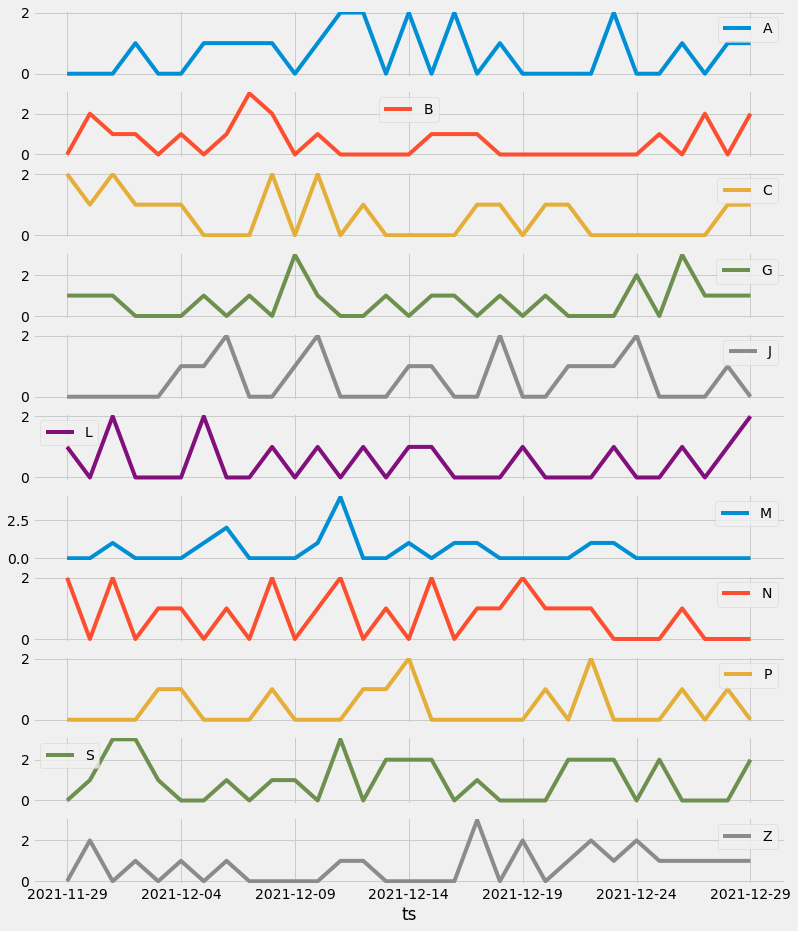

In [430]:
plt.style.use("fivethirtyeight") # ряды предсказания
pivot.plot(subplots=True, figsize=(12, 15))

In [ ]:
# для оценки результатата сравним сумму значений продаж в прогнозе и на реальных данных за жтот период

In [531]:
real_data = pd.read_excel(r'C:\Users\ekaterina\Desktop\прод101.xlsx')
real_data

,g,day,q
0,NaN,NaN,NaN
1,A,327.0,0.0
2,A,328.0,0.0
3,A,329.0,0.0
4,A,330.0,1.0
...,...,...,...
337,Z,353.0,1.0
338,Z,354.0,1.0
339,Z,355.0,1.0
340,Z,356.0,1.0


In [ ]:
#Как можно увидеть сравнения сумм значений предсказания и реальных продаж, прогноз очень близок к реальному значению

In [525]:
real_data['q'].sum()

213.0

In [528]:
DdayKoeff2['predict'].sum()

217

In [532]:
pivot2 = (real_data.assign(idx=real_data.groupby('g').cumcount()).pivot_table(index='day', columns='g', 
                              values='q'))#, aggfunc='sum'))
pivot2

g,A,B,C,G,J,L,M,N,P,S,Z
day,,,,,,,,,,,
327.0,0.0,0.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,0.0,0.0
328.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
329.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,3.0,0.0
330.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,1.0
331.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
332.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
333.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0
334.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
335.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


array([<AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
       <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
       <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
       <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
       <AxesSubplot:xlabel='day'>, <AxesSubplot:xlabel='day'>,
       <AxesSubplot:xlabel='day'>], dtype=object)

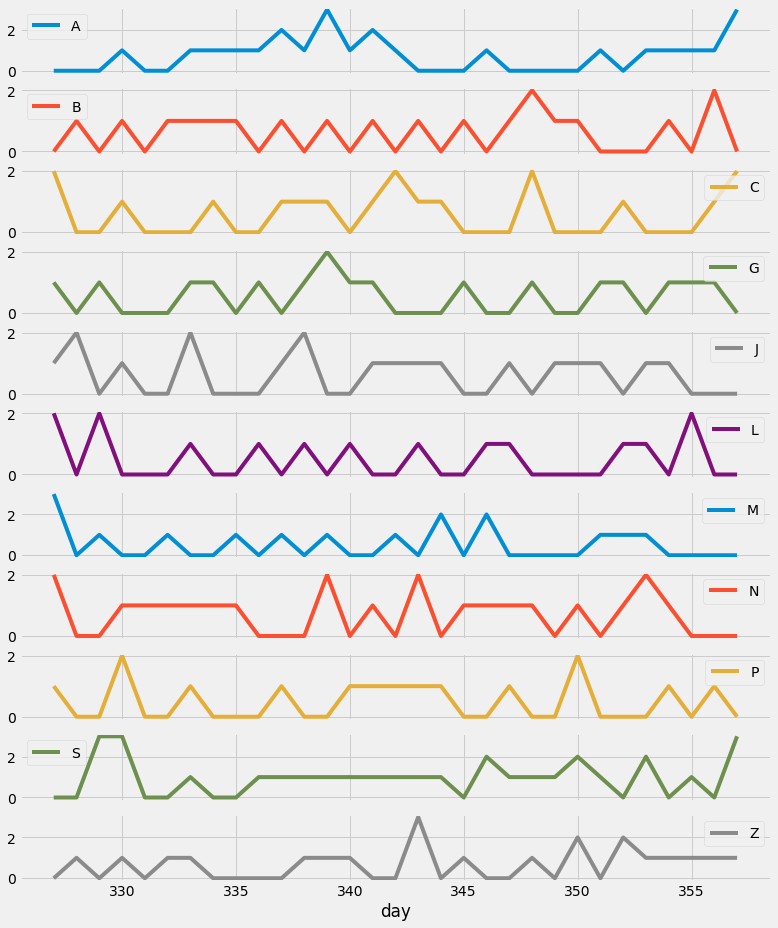

In [533]:
plt.style.use("fivethirtyeight")
pivot2.plot(subplots=True, figsize=(12, 15)) # ряды реальных данных

In [530]:
from sklearn.metrics import mean_squared_error
from math import sqrt

test = pivot2
predictions = pivot
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

RMSE: 0.853


In [433]:
# plt.style.use("fivethirtyeight")
# pivot2.plot(subplots=True, figsize=(12, 15))

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
fit1 = ExponentialSmoothing(np.asarray(train['Spend']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit(use_boxcox=True)
test['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Spend'], label='Train')
plt.plot(test['Spend'], label='Test')
plt.plot(test['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [533]:
# A1.info()

In [534]:
# A = df_index.loc[['A']]
# A = index.iloc[:, 329]
# A = round(A['A'],2)
# A

In [525]:
# group_ = pd.DataFrame(New_res.groupby(['cg','ts','day'])["q"].sum())
# group_

In [491]:
# for _,i in New_res.iterrows():
#     New_res['q'] = New_res['q'].astype(int)
#     for k,v in dayKoeff.items():
#         dayKoeff['day_num'] = dayKoeff['day_num'].astype(int)
#         dayKoeff['koeff'] = dayKoeff['koeff'].astype(int)
#         if i[['day','cg']] == v[['day_num', 'g']]:
#             dayKoeff['res'] = i['q'] * v['koeff']

In [539]:
# dayKoeff = dayKoeff.sort_values(by=['day_num','g'])
# New_res = New_res.sort_values(by=['day','cg'])

# # # #############################################################

In [530]:

h = New_res.resample("D").mean()
plt.figure(figsize=(17, 8))
plt.plot(df_day.q)
plt.title('Покупки')
plt.ylabel('Количество')
plt.xlabel('Дата')
plt.grid(False)
plt.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
#Коэффициент сезонности каждой недели = продажи в штуках этой недели/ продажи за месяц.
#Коэффициент сезонности = среднее значение из коэффициентов по конкретным неделям.

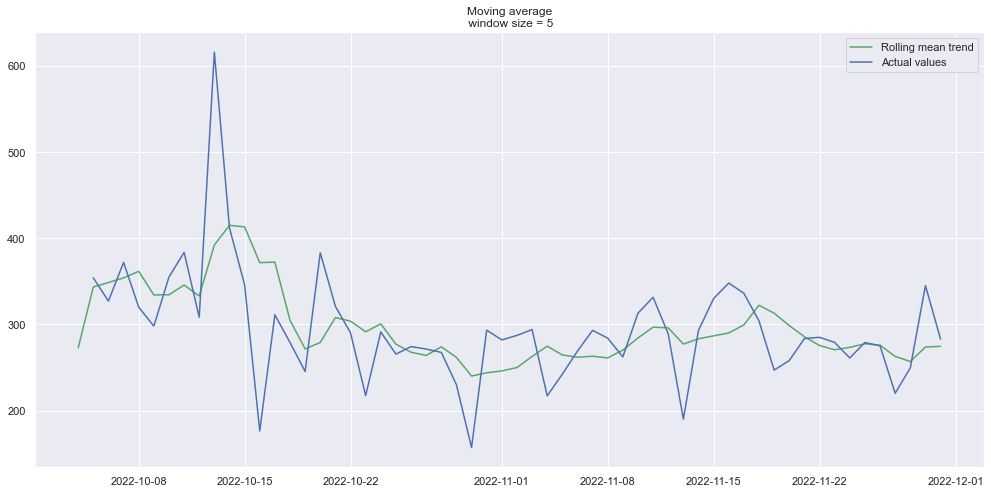

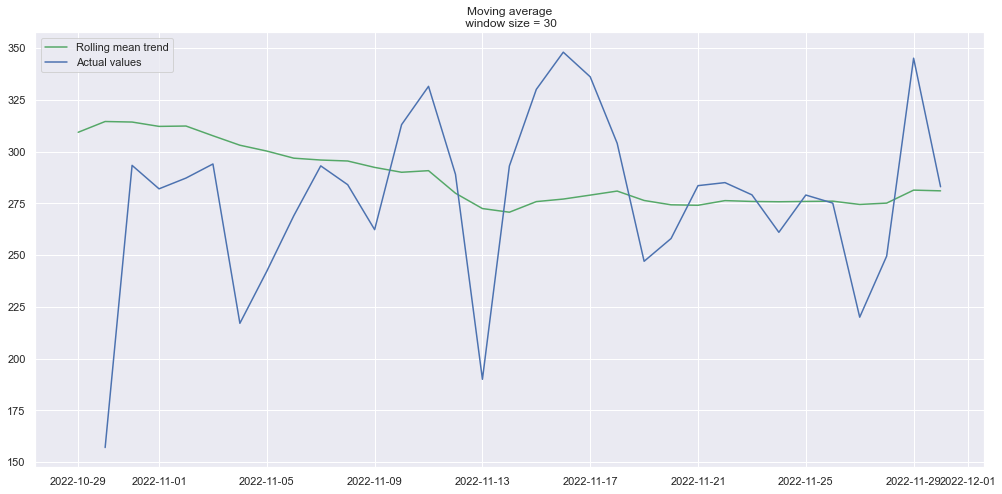

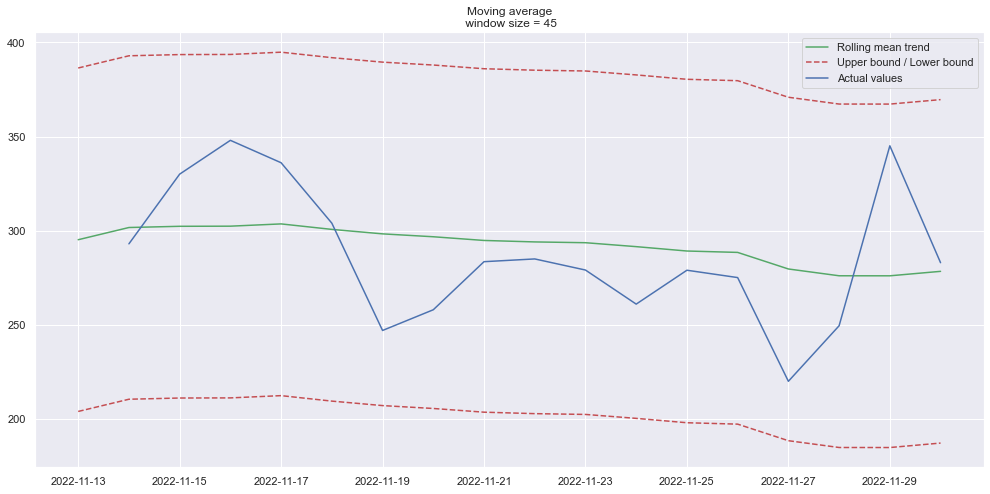

In [84]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
#Smooth by the previous 5 days (by week)
plot_moving_average(Dgrp.q, 5)

#Smooth by the previous month (30 days)
plot_moving_average(Dgrp.q, 30)

#Smooth by previous quarter (90 days)
plot_moving_average(Dgrp.q, 45, plot_intervals=True)